# AI 221: Machine Exercise 1

### Problem 1: Energy Efficiency in Buildings

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import Ridge, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,\
    f1_score, precision_score, recall_score, roc_curve, roc_auc_score

The dataset contains 768 samples of simulated buildings with 8 attributes (X1 to X8) and two targets (Y1 and Y2)

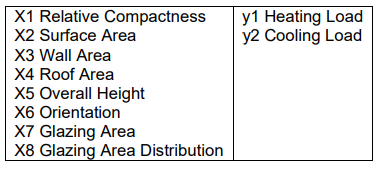

In [2]:
df = pd.read_excel("energy+efficiency/ENB2012_data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.shape

(768, 10)

Predict the heating load only

In [4]:
X = df.iloc[:, :8]
y = df.iloc[:, 8].to_frame()
print(X.columns)
print(y.columns)
X, y = X.to_numpy(), y.to_numpy()

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')
Index(['Y1'], dtype='object')


### a.

**Split the samples into 60% Training, 20% Validation, and 20% Testing data at random**

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(460, 8) (460, 1)
(154, 8) (154, 1)
(154, 8) (154, 1)


**Build a pipeline with Standard scaler then linear ridge regression, set 10 different choices of regularization, and find the best model with highest accuracy on validation**

In [6]:
reg_params = np.array([0, 0.001, 0.01, 0.1, 0.25, 0.5, 1, 2.5, 5, 10])

In [7]:
def model_train_val(X_train, X_val, y_train, y_val, reg_params):
    max_R2 = 0
    best_alpha = 0
    best_model = 0
    best_train_R2 = 0
    best_val_R2 = 0
    for alpha in reg_params:
        model = make_pipeline(StandardScaler(),
                            Ridge(alpha=alpha)).fit(X_train, y_train)
        train_R2 = model.score(X_train, y_train)
        val_R2 = model.score(X_val, y_val)
        print(f"Alpha: {alpha}")
        print(f"\tTraining accuracy (R2): {train_R2}")
        print(f"\tValidation accuracy (R2): {val_R2}")
        if val_R2 > max_R2:
            max_R2 = val_R2
            best_alpha = alpha
            best_model = model
            best_train_R2 = train_R2
            best_val_R2 = val_R2
    return best_alpha, best_model, best_train_R2, best_val_R2

In [8]:
best_alpha, best_model, best_train_R2, best_val_R2 = model_train_val(X_train, X_val, y_train, y_val, reg_params)

Alpha: 0.0
	Training accuracy (R2): 0.9241269637387363
	Validation accuracy (R2): 0.9091426324395059
Alpha: 0.001
	Training accuracy (R2): 0.9241944811129945
	Validation accuracy (R2): 0.9089148038898616
Alpha: 0.01
	Training accuracy (R2): 0.9241944515825671
	Validation accuracy (R2): 0.9089101142701239
Alpha: 0.1
	Training accuracy (R2): 0.9241916941741101
	Validation accuracy (R2): 0.9088605007809303
Alpha: 0.25
	Training accuracy (R2): 0.924178806231086
	Validation accuracy (R2): 0.9087686494331253
Alpha: 0.5
	Training accuracy (R2): 0.9241409221220961
	Validation accuracy (R2): 0.9085974458680424
Alpha: 1.0
	Training accuracy (R2): 0.924029488218916
	Validation accuracy (R2): 0.9082161700342335
Alpha: 2.5
	Training accuracy (R2): 0.923583067548093
	Validation accuracy (R2): 0.9069642662107661
Alpha: 5.0
	Training accuracy (R2): 0.9226900037668789
	Validation accuracy (R2): 0.9048023326945012
Alpha: 10.0
	Training accuracy (R2): 0.9206660403364142
	Validation accuracy (R2): 0.90057

**Evaluate the model using the test data and show the best model’s coefficients, intercept, and its training, validation, and test accuracy**

In [9]:
def eval_model(best_alpha, best_model, best_train_R2, best_val_R2, X_test, y_test):
    print(f"Best alpha: {best_alpha}")
    print(f"Coefficients: {best_model[1].coef_}")
    print(f"Intercept: {best_model[1].intercept_}")
    print(f"Training accuracy (R2) of Best Model: {best_train_R2}")
    print(f"Validation accuracy (R2) of Best Model: {best_val_R2}")

    test_R2 = best_model.score(X_test, y_test)
    print(f"Testing accuracy (R2) of Best Model: {test_R2}")
    return

In [10]:
eval_model(best_alpha, best_model, best_train_R2, best_val_R2, X_test, y_test)

Best alpha: 0.0
Coefficients: [[-5.93614634e+00  4.90782857e+13 -2.46453121e+13 -5.03487675e+13
   7.52707647e+00  2.57256184e-03  2.52811183e+00  2.89643957e-01]]
Intercept: [22.36132169]
Training accuracy (R2) of Best Model: 0.9241269637387363
Validation accuracy (R2) of Best Model: 0.9091426324395059
Testing accuracy (R2) of Best Model: 0.8951386567478389


### b.

**Top 5 features among X1 to X8**

In [11]:
sorted_indices = np.argsort(np.abs(best_model[1].coef_[0]))[::-1]
top5_coef = sorted_indices[:5]
print(["X" + str(x) for x in top5_coef + 1])

['X4', 'X2', 'X3', 'X5', 'X1']


**Using only the top 5 features**

In [12]:
X_train_5, X_val_5, X_test_5 = X_train[:, top5_coef], X_val[:, top5_coef], X_test[:, top5_coef]
print(X_train_5.shape, y_train.shape)
print(X_val_5.shape, y_val.shape)
print(X_test_5.shape, y_test.shape)

(460, 5) (460, 1)
(154, 5) (154, 1)
(154, 5) (154, 1)


In [13]:
best_alpha_5, best_model_5, best_train_R2_5, best_val_R2_5 = model_train_val(X_train_5, X_val_5, y_train, y_val, reg_params)

Alpha: 0.0
	Training accuracy (R2): 0.8578233919099905
	Validation accuracy (R2): 0.8238859835810943
Alpha: 0.001
	Training accuracy (R2): 0.8583073565021835
	Validation accuracy (R2): 0.8236637115496039
Alpha: 0.01
	Training accuracy (R2): 0.85830733365417
	Validation accuracy (R2): 0.8236565658164747
Alpha: 0.1
	Training accuracy (R2): 0.8583051903639857
	Validation accuracy (R2): 0.823585404955056
Alpha: 0.25
	Training accuracy (R2): 0.858295081193609
	Validation accuracy (R2): 0.8234682638256955
Alpha: 0.5
	Training accuracy (R2): 0.8582648961153354
	Validation accuracy (R2): 0.823277759410247
Alpha: 1.0
	Training accuracy (R2): 0.8581735019856105
	Validation accuracy (R2): 0.8229139864532089
Alpha: 2.5
	Training accuracy (R2): 0.8577831467087642
	Validation accuracy (R2): 0.8219060257792312
Alpha: 5.0
	Training accuracy (R2): 0.8569451650463548
	Validation accuracy (R2): 0.8202963063589256
Alpha: 10.0
	Training accuracy (R2): 0.8549654265834381
	Validation accuracy (R2): 0.8171062

In [14]:
eval_model(best_alpha_5, best_model_5, best_train_R2_5, best_val_R2_5, X_test_5, y_test)

Best alpha: 0.0
Coefficients: [[-9.82101045e+14  9.57319078e+14 -4.80730473e+14  7.76154863e+00
  -6.20942415e+00]]
Intercept: [22.93658402]
Training accuracy (R2) of Best Model: 0.8578233919099905
Validation accuracy (R2) of Best Model: 0.8238859835810943
Testing accuracy (R2) of Best Model: 0.8090068116971656


**Based on your results for this Problem, what insights did you gain?**
- Overall, regularization does not improve the model's performance on validation for both *a* and *b*, meaning that penalizing larger coefficient is not helping the model (the features might be very significant in prediction or there are minimal noise/outliers)
- The model is not overfitting and has a good generalization with a Linear Regression model (0 regularization parameter)
- The results of using the 5 most important predictor of heating load shows that there are no significant improvement in the model's performance across all accuracy measures
- More than 5 feautes are needed for better prediction performance
- The wall area, roof area, and overall heigh contribute the most (by a large margin) to the heating load
- The heating load increases with larger wall area, while it also increases with smaller roof area and overall height, as indicated by the sign of the coefficients.

### Problem 2: Classifying Breast Tumors

In [15]:
label = ["radius", "texture", "perimeter", "area",
         "smoothness", "compactness", "concavity",
         "concave_points", "symmetry", "fractal_dimension"]
labels = []
for i in range(3):
    labels.extend([j + str(i+1) for j in label])
feature_names = ["ID", "Diagnosis"] + labels

In [16]:
df2 = pd.read_csv("breast+cancer+wisconsin+diagnostic/wdbc.data", names=feature_names)

The dataset contains ~~699~~ 569 instances of breast tumors.\
Note: The dataset from the link provided is the Breast Cancer Wisconsin (Diagnostic) with 569 instances and 30 features

In [17]:
df2.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
df2.shape

(569, 32)

Remove rows with missing values

In [19]:
df2.dropna(inplace=True)
df2.shape

(569, 32)

Note: There are no rows with missing values

Remove the column ~~"Sample code number"~~ "ID"

In [20]:
df2.drop("ID", axis=1, inplace=True)
df2.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Replace the ~~“Class”~~ "Diagnosis" values into 0’s and 1’s (0 for benign, 1 for malignant)

In [21]:
ordinal_encoder = OrdinalEncoder(categories=[["B", "M"]])
df2["Diagnosis"] = ordinal_encoder.fit_transform(df2[["Diagnosis"]])
df2.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### a.

**Split the samples into 70% Training and 30% Testing at random with "stratify=y2"**

In [22]:
X2 = df2.iloc[:, 1:].to_numpy()
y2 = df2.iloc[:, 0].to_numpy()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, stratify=y2, random_state=0)
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(398, 30) (398,)
(171, 30) (171,)


**Build a pipeline using the Standard scaler and logistic regression with default penalty settings**

In [23]:
model2 = make_pipeline(StandardScaler(),
                       LogisticRegression()).fit(X2_train, y2_train)

**Model’s training and testing accuracy**

In [24]:
print(f"training accuracy = {model2.score(X2_train, y2_train)}")
print(f"testing accuracy = {model2.score(X2_test, y2_test)}")

training accuracy = 0.9949748743718593
testing accuracy = 0.9532163742690059


**Most important features (Top 10)**

In [43]:
coef2 = model2[1].coef_[0]
sorted_indices2 = np.argsort(np.abs(coef2))[::-1]
top_coef2 = pd.DataFrame({"Ranking": range(30),
                          "Feature Name": np.array(feature_names[2:])[sorted_indices2],
                          "Coefficient": coef2[sorted_indices2]})
top_coef2.set_index("Ranking", inplace=True)
top_coef2.head(10)

,Feature Name,Coefficient
Ranking,,
0,radius2,1.254367
1,radius3,1.029123
2,concave_points1,0.946317
3,symmetry3,0.940877
4,compactness2,-0.924221
5,perimeter2,0.890697
6,perimeter3,0.890140
7,area3,0.879648
8,smoothness3,0.820349


### b.

**Training Evaluation Metrics**

F1-score: 0.9931972789115647
Precision: 1.0
Recall: 0.9864864864864865
False alarm rate: 0.0


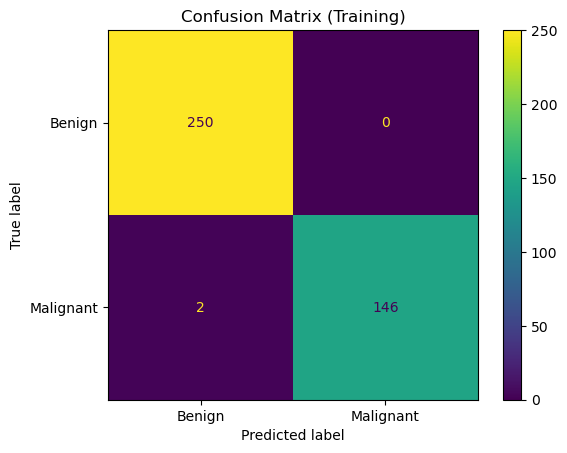

In [26]:
y2_train_pred = model2.predict(X2_train)
cfm_train = confusion_matrix(y2_train, y2_train_pred)
cm_display_train = ConfusionMatrixDisplay(confusion_matrix = cfm_train, display_labels = ["Benign", "Malignant"])
cm_display_train.plot()
plt.title('Confusion Matrix (Training)')
print(f"F1-score: {f1_score(y2_train, y2_train_pred)}")
print(f"Precision: {precision_score(y2_train, y2_train_pred)}")
print(f"Recall: {recall_score(y2_train, y2_train_pred)}")
print(f"False alarm rate: {cfm_train[0, 1] / (cfm_train[0, 0] + cfm_train[0, 1])}")

AUC:  0.9982972972972973


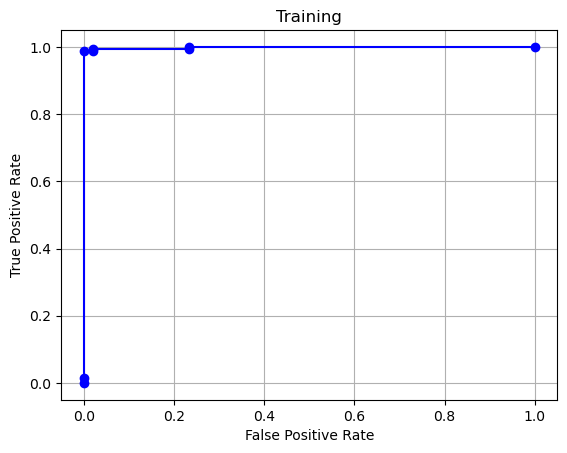

In [27]:
y2_train2 = model2.predict_proba(X2_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y2_train, y2_train2[:, 1])
print(f"AUC: ",roc_auc_score(y2_train, y2_train2[:, 1]))
plt.plot(fpr_train,tpr_train,'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title("Training")
plt.show()

**Testing Evaluation Metrics**

F1-score: 0.9375
Precision: 0.9375
Recall: 0.9375
False alarm rate: 0.037383177570093455


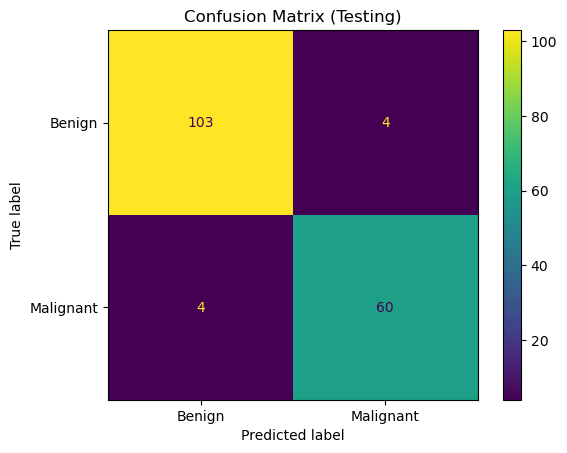

In [28]:
y2_test_pred = model2.predict(X2_test)
cfm_test = confusion_matrix(y2_test, y2_test_pred)
cm_display_test = ConfusionMatrixDisplay(confusion_matrix = cfm_test, display_labels = ["Benign", "Malignant"])
cm_display_test.plot()
plt.title('Confusion Matrix (Testing)')
print(f"F1-score: {f1_score(y2_test, y2_test_pred)}")
print(f"Precision: {precision_score(y2_test, y2_test_pred)}")
print(f"Recall: {recall_score(y2_test, y2_test_pred)}")
print(f"False alarm rate: {cfm_test[0, 1] / (cfm_test[0, 0] + cfm_test[0, 1])}")

AUC:  0.9916764018691588


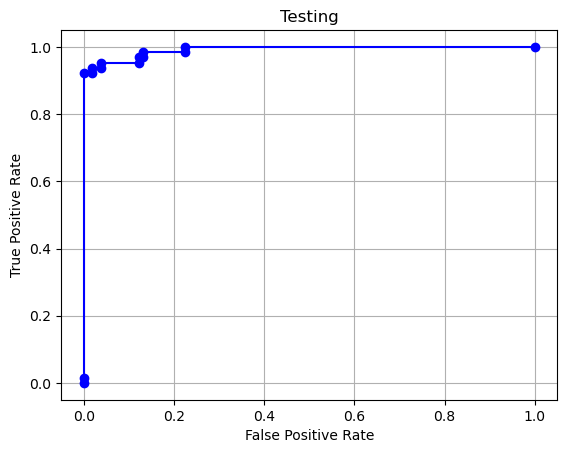

In [29]:
y2_test2 = model2.predict_proba(X2_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y2_test, y2_test2[:, 1])
print(f"AUC: ",roc_auc_score(y2_test, y2_test2[:, 1]))
plt.plot(fpr_test, tpr_test,'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title("Testing")
plt.show()

**Based on your results for this Problem, what insights did you gain?**
- The testing accuracy is just slightly lesser than the training accuracy
- The Logistic Regression model performed well based on the high accuracy for both training and testing
- Radius, concave points, and perimeter were the features that has a higher contribution (based on its multiple appearance in the top 10 features) in predicting tumor classification
- Radius in particular is an important factor in determining benign and malignant tumor
- The model has perfect precision and false alarm rate on training, meaning it successfully classified all malignant tumor in the train set
- The model has equal F1-score, precision and recall with very small false alarm rate on testing
- A small false alarm rate is good because it means that people with benign tumor are not frequently diagnosed with malignant tumor
- The AUC score of both training and testing are similar, indicating that the model is not overfitting
- The threshold can be adjusted for testing can be adjusted to diagnose 100% (TPR) of people that have malignant tumor at the expense of misdiagnosing (FPR) some of people having benign. This might be useful on cases where having a certain type of tumor can be fatal.
